## Imports

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_column",200)

In [5]:
df = pd.read_csv("BAJFINANCE.csv")

In [6]:
print(df.shape)
df.head()

(5070, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [7]:
df.set_index("Date",inplace=True)

#### Visualize Volume Weighted Avg Price

In [8]:
px.line(df,y="VWAP")

#### The date of trades was started in June 2011

In [9]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [10]:
px.line(df,y="Trades")

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 2011-06-01 to 2020-08-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2291 non-null   object 
 1   Series              2291 non-null   object 
 2   Prev Close          2291 non-null   float64
 3   Open                2291 non-null   float64
 4   High                2291 non-null   float64
 5   Low                 2291 non-null   float64
 6   Last                2291 non-null   float64
 7   Close               2291 non-null   float64
 8   VWAP                2291 non-null   float64
 9   Volume              2291 non-null   int64  
 10  Turnover            2291 non-null   float64
 11  Trades              2291 non-null   float64
 12  Deliverable Volume  2291 non-null   float64
 13  %Deliverble         2291 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 268.5+ KB


In [13]:
data = df.copy()

In [14]:
lag_features = ['High','Low','Trades','Volume','Turnover']
window_1 = 3
window_2 = 7

### Rolling Avg for different WIndows

In [15]:
for feature in lag_features:
    data[feature+"_rolling_mean_3"] = data[feature].rolling(window=window_1).mean()
    data[feature+"_rolling_mean_7"] = data[feature].rolling(window=window_2).mean()

In [16]:
for feature in lag_features:
    data[feature+"_rolling_std_3"] = data[feature].rolling(window=window_1).std()
    data[feature+"_rolling_std_7"] = data[feature].rolling(window=window_2).std()

In [17]:
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_rolling_mean_3,High_rolling_mean_7,Low_rolling_mean_3,Low_rolling_mean_7,Trades_rolling_mean_3,Trades_rolling_mean_7,Volume_rolling_mean_3,Volume_rolling_mean_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.0,636.5,616.0,627.0,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.0,638.9,620.0,634.0,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.dropna(inplace=True)

In [19]:
data.shape

(2285, 34)

### Split the Data

In [20]:
X_train = data[:1800]
X_test = data[1800:]

In [21]:
print(X_train.shape)
print(X_test.shape)

(1800, 34)
(485, 34)


In [22]:
X_test.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_rolling_mean_3,High_rolling_mean_7,Low_rolling_mean_3,Low_rolling_mean_7,Trades_rolling_mean_3,Trades_rolling_mean_7,Volume_rolling_mean_3,Volume_rolling_mean_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,8.793882e+14,135043.0,728912.0,0.2171,2719.400000,2758.878571,2610.283333,2652.721429,89504.000000,86114.285714,2.064092e+06,2.027492e+06,5.465978e+14,5.474503e+14,44.330125,63.787942,56.544592,53.608580,40756.099335,32012.681782,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,6.913828e+14,126357.0,586940.0,0.2188,2681.250000,2724.157143,2558.116667,2624.264286,112805.333333,88611.142857,2.536726e+06,2.051134e+06,6.625717e+14,5.457439e+14,51.662632,51.914260,40.110047,66.236890,31297.267202,34656.587966,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,4.759644e+14,76712.0,424000.0,0.2362,2663.083333,2710.707143,2568.200000,2616.085714,112704.000000,84138.714286,2.611710e+06,1.935154e+06,6.822451e+14,5.122064e+14,23.795710,47.776811,55.315527,61.033875,31471.093038,33742.606344,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,3.803841e+14,58481.0,264129.0,0.1815,2660.150000,2695.735714,2576.866667,2604.692857,87183.333333,82386.142857,1.977597e+06,1.896135e+06,5.159104e+14,4.995687e+14,23.275363,44.294307,55.950343,57.040858,35128.684296,34854.254176,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,3.764693e+14,59710.0,200650.0,0.1384,2656.983333,2680.871429,2591.166667,2588.635714,64967.666667,84253.142857,1.566580e+06,1.939194e+06,4.109393e+14,5.091420e+14,28.146507,47.625517,33.719740,50.588419,10189.437390,32916.577887,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14


In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7', 'Volume_rolling_std_3', 'Volume_rolling_std_7',
       'Turnover_rolling_std_3', 'Turnover_rolling_std_7'],
      dtype='object')

In [24]:
ind_features =['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7', 'Volume_rolling_std_3', 'Volume_rolling_std_7',
       'Turnover_rolling_std_3', 'Turnover_rolling_std_7']

### Building the Model

In [25]:
model = auto_arima(y=X_train['VWAP'], exogenous=X_train[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.651 seconds


In [26]:
model.fit(X_train['VWAP'],X_train[ind_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
forecast = model.predict(n_periods= len(X_test), X = X_test[ind_features])

In [28]:
X_test['Forecast_ARIMA'] = forecast.values

In [29]:
X_test.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_rolling_mean_3,High_rolling_mean_7,Low_rolling_mean_3,Low_rolling_mean_7,Trades_rolling_mean_3,Trades_rolling_mean_7,Volume_rolling_mean_3,Volume_rolling_mean_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,8.793882e+14,135043.0,728912.0,0.2171,2719.400000,2758.878571,2610.283333,2652.721429,89504.000000,86114.285714,2.064092e+06,2.027492e+06,5.465978e+14,5.474503e+14,44.330125,63.787942,56.544592,53.608580,40756.099335,32012.681782,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,2623.156324
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,6.913828e+14,126357.0,586940.0,0.2188,2681.250000,2724.157143,2558.116667,2624.264286,112805.333333,88611.142857,2.536726e+06,2.051134e+06,6.625717e+14,5.457439e+14,51.662632,51.914260,40.110047,66.236890,31297.267202,34656.587966,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,2638.808739
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,4.759644e+14,76712.0,424000.0,0.2362,2663.083333,2710.707143,2568.200000,2616.085714,112704.000000,84138.714286,2.611710e+06,1.935154e+06,6.822451e+14,5.122064e+14,23.795710,47.776811,55.315527,61.033875,31471.093038,33742.606344,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,2624.606486
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,3.803841e+14,58481.0,264129.0,0.1815,2660.150000,2695.735714,2576.866667,2604.692857,87183.333333,82386.142857,1.977597e+06,1.896135e+06,5.159104e+14,4.995687e+14,23.275363,44.294307,55.950343,57.040858,35128.684296,34854.254176,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,2597.867767
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,3.764693e+14,59710.0,200650.0,0.1384,2656.983333,2680.871429,2591.166667,2588.635714,64967.666667,84253.142857,1.566580e+06,1.939194e+06,4.109393e+14,5.091420e+14,28.146507,47.625517,33.719740,50.588419,10189.437390,32916.577887,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,2614.915056


<Axes: xlabel='Date'>

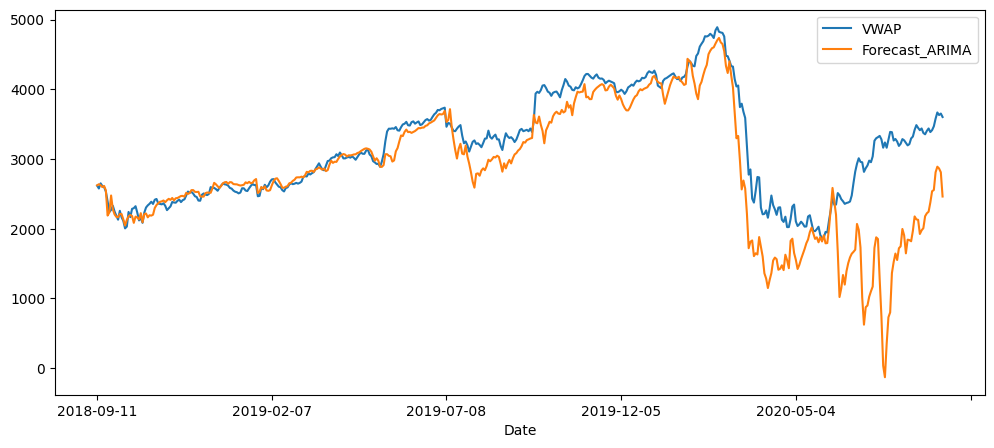

In [30]:
X_test[['VWAP','Forecast_ARIMA']].plot(figsize=(12,5))

### Evaluating the Model

In [35]:
mean_squared_error(X_test['VWAP'],X_test['Forecast_ARIMA'])

404375.107626199

In [34]:
np.sqrt(mean_squared_error(X_test['VWAP'],X_test['Forecast_ARIMA']))

635.9049517232894